In [2]:
# Gerekli paketleri indirelim ve datayi anlamaya calisalim

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")


In [4]:
#!pip install chart_studio

In [6]:
import chart_studio

In [7]:
data=pd.read_csv("AppleStore.csv")
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


**Meaning of columns:**

* "size_bytes": Size (in Bytes)
* "rating_count_tot": User Rating counts (for all version)
* "rating_count_ver": User Rating counts (for current version)
* "user_rating" : Average User Rating value (for all version)
* "user_rating_ver": Average User Rating value (for current version)
* "cont_rating": Content Rating
* "sup_devices.num": Number of supporting devices
* "ipadSc_urls.num": Number of screenshots showed for display
* "lang.num": Number of supported languages
* "vpp_lic": Vpp Device Based Licensing Enabled

**EDA**

Tüm sütunları kullanmayacağız, ihtiyacımız olmayan bazılarını kaldıralım

In [8]:
data.drop(["Unnamed: 0","id","currency","cont_rating","vpp_lic","ipadSc_urls.num",
           "ver"],axis=1,inplace=True)
data.dropna(inplace=True)

byte megabyte a cevirelim

In [9]:
data.size_bytes=data.size_bytes/(1024*1024)
data.size_bytes=data.size_bytes.astype(int)
data.rename({"size_bytes":"size_mb"},axis=1,inplace=True)
data.head()

,track_name,size_mb,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,prime_genre,sup_devices.num,lang.num
0,PAC-MAN Premium,96,3.99,21292,26,4.0,4.5,Games,38,10
1,Evernote - stay organized,151,0.00,161065,26,4.0,3.5,Productivity,37,23
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",95,0.00,188583,2822,3.5,4.5,Weather,37,3
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",122,0.00,262241,649,4.0,4.5,Shopping,37,9
4,Bible,88,0.00,985920,5320,4.5,5.0,Reference,37,45


In [10]:
data.describe()

,size_mb,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,lang.num
count,7197.000000,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,189.407531,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,5.434903
std,342.562278,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,7.919593
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000
25%,44.000000,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,1.000000
50%,92.000000,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,1.000000
75%,173.000000,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,8.000000
max,3839.000000,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,75.000000


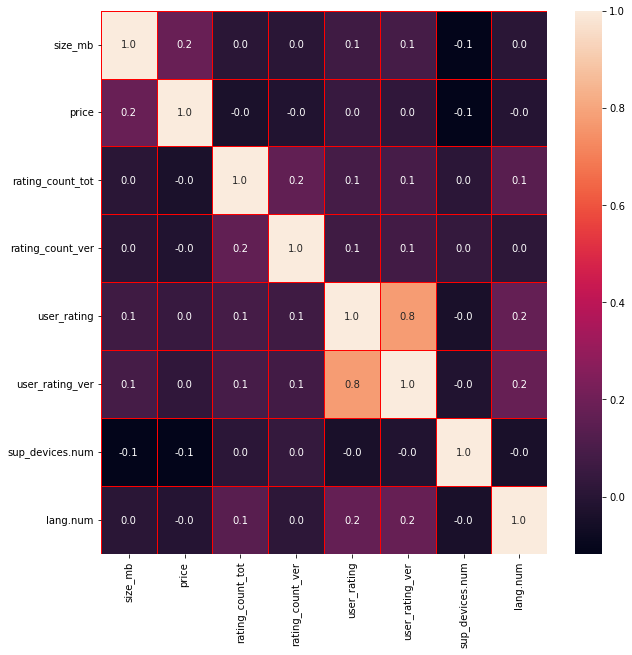

In [11]:
#Correlation Maps
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,linecolor="red",fmt=".1f",ax=ax)
plt.show()

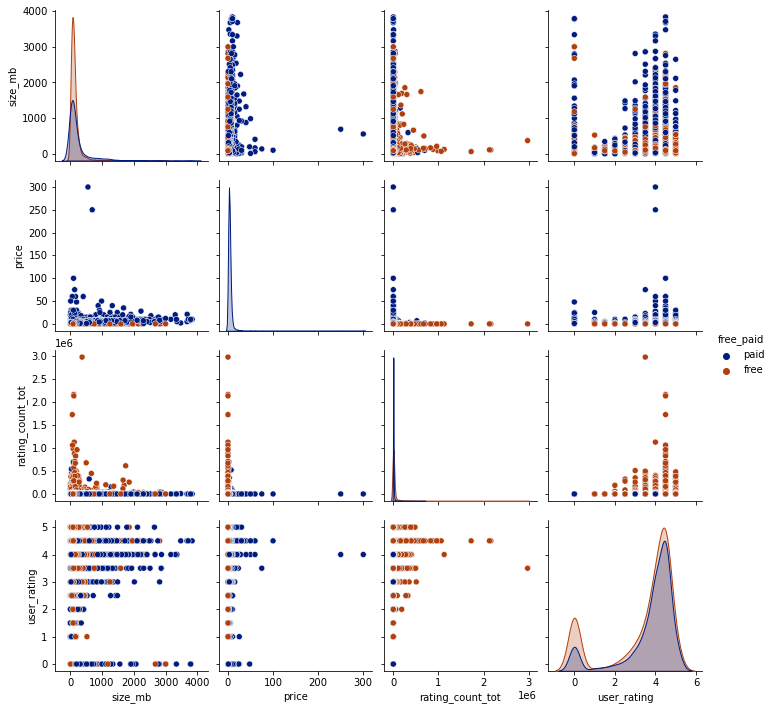

In [12]:
df_free=data.price
df_free=["free" if i==0 else "paid" for i in df_free]
data_pair=data.loc[:,["size_mb","price","rating_count_tot","user_rating","prime_genre"]]
data_pair["free_paid"]=df_free
sns.pairplot(data_pair,palette="dark",hue="free_paid")
plt.show()

Veriler arasındaki ilişkiyi görebiliriz. Ayrıca uygulamalarımızı "free" ve "paid" olarak gruplandırdık.
 

Text(0.5, 1.0, 'Count of paid & free apps')

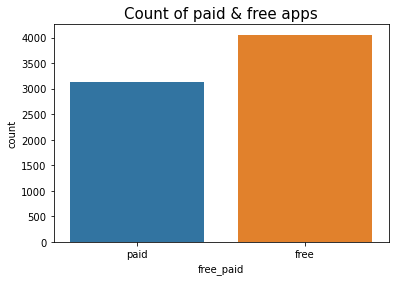

In [13]:
sns.countplot(data_pair.free_paid)
plt.title("Count of paid & free apps",fontsize=15)

Amount of free apps are more than paid apps

Let's check our datas sorted by groups

In [14]:
genre_list=data.prime_genre.value_counts()
labels=genre_list.index
values=genre_list.values
trace={"values":values,"labels":labels,"domain":{"x":[0,0.95]},"name":"number of genre",
       "hoverinfo":"label+percent+value","hole":0.3,"type":"pie"}
layout={"autosize":False,"width":800,"height":800,
        "title":"Pie Chart of Number of Genre","annotations":[{"font":{"size":16},"showarrow":False,
                                                              "text":"Number of apps","x":0.11,"y":0.95}]}
data1=[trace]
fig=go.Figure(data=data1,layout=layout)
iplot(fig)

Oyun sektörünün ağırlıklı olarak uygulama mağazası pazarı olduğunu görüyoruz. Bunların yarısından fazlası "games" uygulamalarıdır. Oyunu yüzde 7 civarında ile "entertainment" ve "education" takip ediyor.

Let's check size of genres

In [15]:
genre_size=data.loc[:,["prime_genre","size_mb"]]
genre_size=genre_size.groupby("prime_genre").mean()
new_index=(genre_size["size_mb"].sort_values(ascending=False)).index.values
genre_size=genre_size.reindex(new_index)
genre_size.head()

,size_mb
prime_genre,
Medical,358.478261
Games,270.011393
Education,171.573951
Book,170.053571
Reference,147.500000


We calculated mean size of each genres and sorted

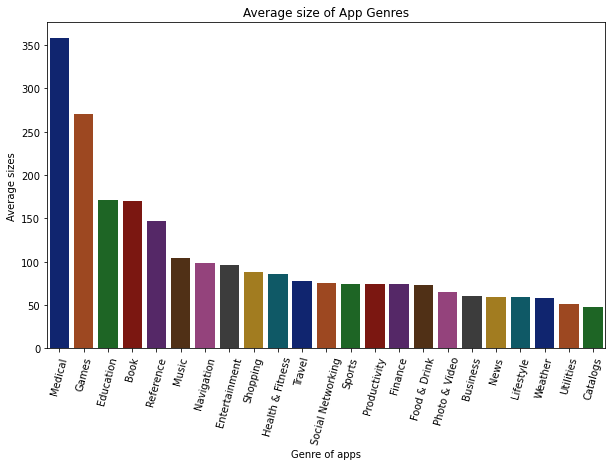

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x=genre_size.index,y=genre_size.size_mb,palette="dark")
plt.xticks(rotation=75)
plt.xlabel("Genre of apps")
plt.ylabel("Average sizes")
plt.title("Average size of App Genres")
plt.show()

"Medical" ve "Games" uygulamalarının diğerlerinden daha büyük boyutlara sahip olduğu açıkça görülmektedir.

In [17]:
trace=go.Histogram(x=data.user_rating,name="User Ratings",marker=dict(color="rgb(165,70,225)"),text="apps")
data1=[trace]
layout=go.Layout(autosize=False,width=800,height=500,title="Histogram of User Ratings",xaxis=dict(title="Rating"),yaxis=dict(title="Count"))
fig=go.Figure(data=data1,layout=layout)
print("Average rating: ",np.mean(data.user_rating))
iplot(fig)

Average rating:  3.526955675976101


Although the users mostly gave 4.5 point, average app rating is 3.5

Let's go deeper and **check all genres!!**

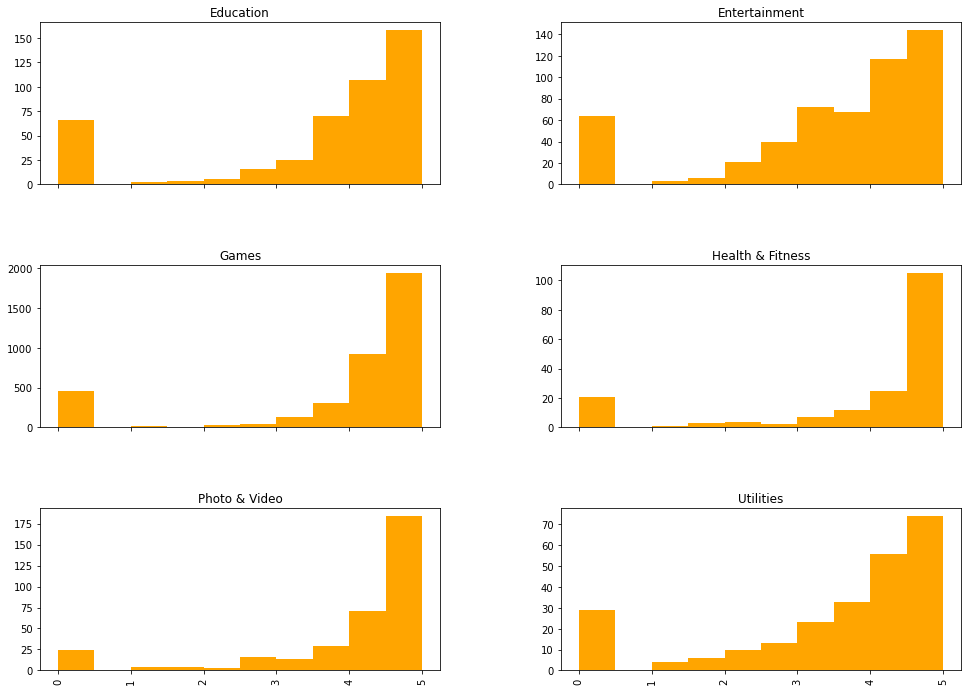

In [18]:
groups = data.groupby('prime_genre').filter(lambda x: len(x) > 178)
groups['user_rating'].hist(by=groups['prime_genre'], sharex=True, figsize=(16,12),color="orange")
plt.show()

We can have a look closer to user rating of each genre (highest six genre)

**Keep going with comparing of each average ratings**

In [19]:
data1=[]
for i in data.prime_genre.value_counts().index[:12]:
    trace=go.Box(y=data.loc[data.prime_genre==i]["user_rating"],name=i)
    data1.append(trace)
iplot(data1)

uygulamalarin nasıl güncellendiklerini bulmaya çalışalım. Güncellenip güncellenmediğini anlamak için basit bir yöntem deneyeceğiz. Ama nasıl?

**When_Updated=(Latest_Version_Rating) / (Total_Rating)**-----> Sonuç diğerlerinden daha büyükse bu, uygulamamızın yakın zamanda güncellendiği anlamına gelir.

In [20]:
updated = data[data["rating_count_tot"]>180000]
updated=updated.loc[:,["track_name","rating_count_tot","rating_count_ver"]]
updated["when_update"]=(updated.rating_count_ver/updated.rating_count_tot)
updated["when_update"]=(updated.when_update-np.min(updated.when_update))/(np.max(updated.when_update)-np.min(updated.when_update))
updated.index = np.arange(1,len(updated)+1)

trace=go.Scatter(x=updated.index,y=updated.when_update,mode="markers",text=updated.track_name,
                marker=dict(color="rgba(0,55,170,0.8)"))
data1=[trace]
layout=dict(title="How Updated Applications",xaxis=dict(title="Application List",zeroline=False,ticklen=5),
           yaxis=dict(title="Updating dates",ticklen=5,zeroline=False))
fig=dict(data=data1,layout=layout)
iplot(fig)

In [21]:
drop_=updated[(updated.track_name=="Infinity Blade")|(updated.track_name=="Real Basketball")|
              (updated.track_name=="WhatsApp Messenger")|
              (updated.track_name=="Zillow Real Estate - Homes for Sale & for Rent")].index
updated.drop(drop_,inplace=True)

trace=go.Scatter(x=updated.index,y=updated.when_update,mode="markers",text=updated.track_name,
                marker=dict(color="rgba(255,0,10,0.9)"))
data1=[trace]
layout=dict(title="How Updated Applications",xaxis=dict(title="Application List",zeroline=False,ticklen=5),
           yaxis=dict(title="Updating dates",ticklen=5,zeroline=False))
fig=dict(data=data1,layout=layout)
iplot(fig)

**Price ve Rating**

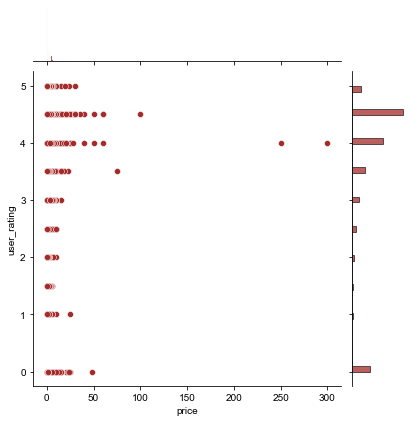

In [22]:
g=sns.jointplot(data["price"],data["user_rating"],color="brown")
sns.set(context='notebook',style='darkgrid')

Aykırı fiyatları kaldırıp tekrar kontrol edelim

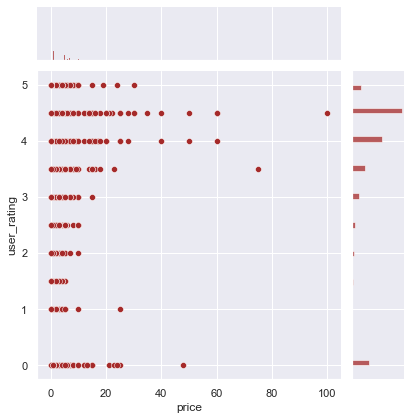

In [23]:
data_=data[data.price<200]
g=sns.jointplot(data_["price"],data_["user_rating"],color="brown")
sns.set(context='notebook',style='darkgrid')

En çok puan alan uygulamaların fiyatlarının 0 ile 20 USD arasında olduğunu görebiliriz.

Ayrıca çoğu yüklü uygulama ücretsiz veya 1 USD'dir.

Durma! Türlerin fiyatını kontrol etmeye devam edin.

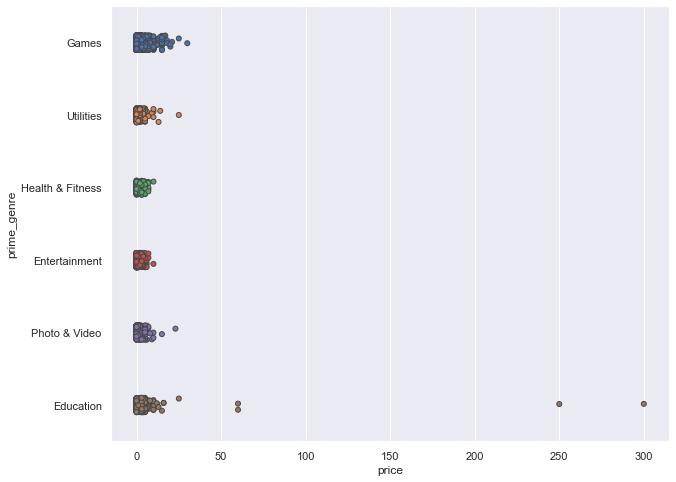

In [24]:
groups = data.groupby('prime_genre').filter(lambda x: len(x) > 178)
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
p = sns.stripplot(x="price", y="prime_genre", data=groups, jitter=True, linewidth=1)

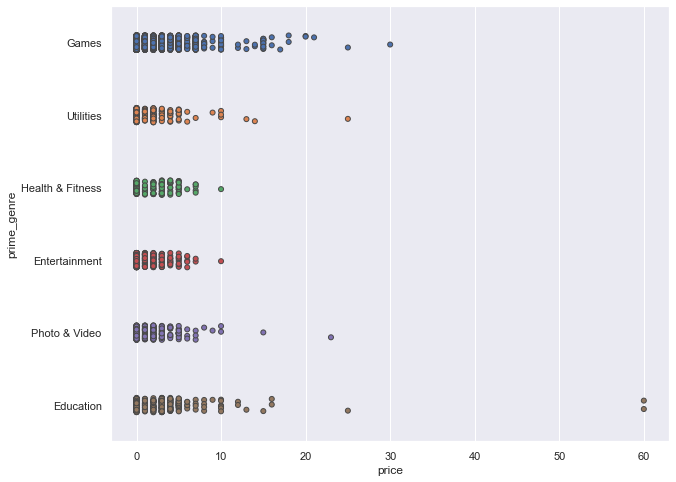

In [25]:
groups=groups[groups.price<100]
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
p = sns.stripplot(x="price", y="prime_genre", data=groups, jitter=True, linewidth=1)